## Imports
Execute the cell below to import all packages needed.

In [20]:
# System functionality
import sys
sys.path.append('..')

import glob
import os
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import graphviz
import math as math
import json
import cv2
import matplotlib.image as mpimg
from sympy import *
from skimage import data, io, filters
from numpy import linspace
from numpy.core.umath import pi
from matplotlib.ticker import FuncFormatter
from matplotlib.font_manager import FontProperties
from emoji_extractor.extract import Extractor
from emojipedia import Emojipedia
from skimage import io

## Load csv into pandas dataframe

In [2]:
path__tweets_csv = '/home/stelios/Desktop/Honours Project/Samples/tweet_data/tweets_joh_all.csv'
path_users_csv = '/home/stelios/Desktop/Honours Project/Samples/user_data/joh.csv'

joh_tweets_df = pd.read_csv(path__tweets_csv,index_col=None, header=0, low_memory = False).applymap(str)
joh_users_df = pd.read_csv(path_users_csv,index_col=None, header=0, low_memory = False).applymap(str)

joh_join_df = joh_tweets_df.join(joh_users_df.set_index('user_id'), on='user_id')

## Bar Chart Formatters

In [22]:
# Millions Formatter Function
def millions(x,pos):
    return '%1.1fK' % (x*1e-3)

# Power of 10 Formatter Function (y log scale bug, so i have created this formatter)
def pow10(x,pos):
    return "{:.0f}\n10 ".format(x)

# Power of 10 (1 d.p) Formatter Function (y log scale bug, so i have created this formatter)
def pow10_1dp(x,pos):
    return "{:.1f}\n10     ".format(x)

# Percenatge Formatter Function
def percentage(x,pos):
    return "{:.1f}%".format(x*100)

# Create a formatters
formatter_millions = FuncFormatter(millions)
formatter_pow10 = FuncFormatter(pow10)
formatter_pow10_1dp = FuncFormatter(pow10_1dp)
formatter_percentage = FuncFormatter(percentage)

# Use TwitterColorEmoji Font (only one supporting emojis) 
emojis_font = FontProperties(fname='./Fonts/TwitterColorEmoji-SVGinOT.ttf',size=55)

## Colours

In [29]:
colors_seagreen_fade=["#f3f8f3","#e8f1e8","#ddeadd","#d2e4d2","#c7ddc7","#bbd6bb","#b0d0b0","#a5c9a5","#9ac29a","#8fbc8f","#80a980","#729672","#648364","#557055","#475e47","#394b39"]

colors_orange_fade=["#fff6e5","#ffedcc","#ffe4b2","#ffdb99","#ffd27f","#ffc966","#ffc04c","#ffb732","#ffae19","#ffa500","#e59400","#cc8400","#b27300","#996300","#7f5200","#664200"]

colors_dodgeblue_fade=["#e7f1fa","#d0e3f5","#b9d5f0","#a2c7eb","#8bb9e6","#74abe1","#5d9ddc","#468fd7","#2f81d2","#1874cd","#1568b8","#135ca4","#10518f","#0e457b","#0c3a66","#092e52"]

colors_indianred_fade=["#faeeee","#f5dddd","#f0cccc","#ebbbbb","#e6aaaa","#e19999","#dc8888","#d77676","#d26666","#cd5555","#b84c4c","#a44444","#8f3b3b","#7b3333","#662a2a","#522222"]

## Emojis on Pie Chart Function

In [30]:
def pie_chart_plot_emojis(ax,fig,x):
    # Set sizes of figure and images
    ax_width = ax.get_window_extent().width
    fig_width = fig.get_window_extent().width
    fig_height = fig.get_window_extent().height
    img_size = ax_width/(fig_width*len(x_linespace))
    img_axs = [None for i in range(len(x_linespace))]

    y_manual = 0.843
    loc = ax.transData.transform((1.88, y_manual))
    img_axs[0] = fig.add_axes([loc[0]/fig_width-img_size/2, loc[1]/fig_height-img_size/2, img_size, img_size], anchor='C')
    img_axs[0].imshow(io.imread("/home/stelios/Desktop/Honours Project/Emojis-usage-in-social-media-by-demographics/Jupyter/Fonts&Pics/other_less.png"))
    img_axs[0].axis("off")
    y_manual =y_manual-0.1408

    # Display emojis pngs on x-axis
    for i in range(len(x)):
        loc = ax.transData.transform((1.88, y_manual))      # Optimize y manually 
        img_axs[i] = fig.add_axes([loc[0]/fig_width-img_size/2, loc[1]/fig_height-img_size/2, img_size, img_size], anchor='C')
        y_manual =y_manual-0.1408
        # Platform 5 = Twitter
        img_axs[i].imshow(io.imread(Emojipedia.search(x[i]).platforms[5].image_url))
        img_axs[i].axis("off")

## Emojis on Bar Chart Function

In [31]:
def bar_chart_plot_emojis(ax,fig,x):
    # Set sizes of figure and images
    ax_width = ax.get_window_extent().width
    fig_width = fig.get_window_extent().width
    fig_height = fig.get_window_extent().height
    img_size = ax_width/(fig_width*len(x_linespace))
    img_axs = [None for i in range(len(x_linespace))]

    # Display emojis pngs on x-axis
    for i in range(len(x)):
        loc = ax.transData.transform((x_linespace[i], 0))      # Optimize y manually 
        img_axs[i] = fig.add_axes([loc[0]/fig_width-img_size/2, loc[1]/fig_height-img_size/2,
                                   img_size, img_size], anchor='C')

        # Platform 5 = Twitter
        img_axs[i].imshow(io.imread(Emojipedia.search(x[i]).platforms[5].image_url))
        img_axs[i].axis("off")

## Extract, Count & Sort Emojis for all

In [32]:
extract = Extractor()

count = extract.count_all_emoji(joh_join_df['text'])

# Display most common
#count.most_common()

# Create panda dataframe to store emojis with counts
emojis_count_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count:
    emojis_count_df = emojis_count_df.append({'Emoji' : emoji , 'Count' : count[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_df = emojis_count_df.sort_values(by=['Count'])
emojis_count_df.tail(20)

,Emoji,Count
0,👀,14580
24,💕,15555
189,😹,16310
10,😁,17479
22,🤔,18054
110,🙌,18165
106,👏,19161
169,🙏,19699
108,😢,25902
5,😊,26942


## Top 15 Emojis Graph

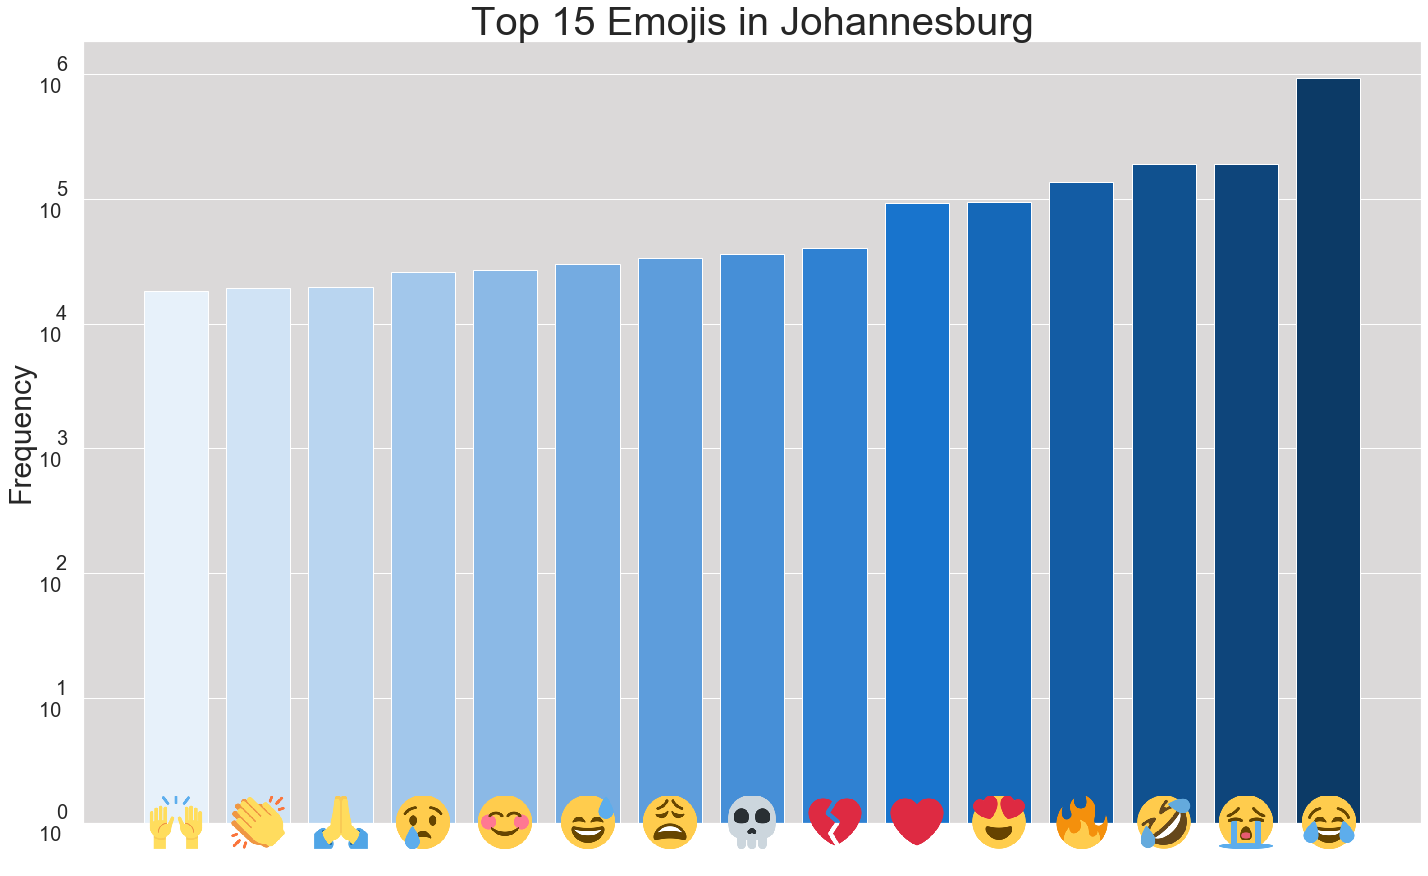

In [47]:
# Top 15 Values
x = emojis_count_df['Emoji'].tail(15).values
y = emojis_count_df['Count'].tail(15).values
y_log = np.log10(y.astype(int))

# Set linespacing
x_linespace = linspace(0, 4*pi, num=15)

# Plot Bar Chart
sns.set(color_codes=True) # Seaborn 
fig, ax = plt.subplots(figsize=(20,12))
ax.yaxis.set_major_formatter(formatter_pow10)
ax.tick_params(axis='both', which='major', pad=10)
ax.set_facecolor('#dbd9d9')
plt.grid(linestyle='-', linewidth=1,axis='y')
plt.bar(x_linespace, y_log, width=0.7, bottom=None, align='center',color =colors_dodgeblue_fade)
ax.get_xaxis().set_visible(False)
plt.yticks(fontsize =20)
plt.ylabel('Frequency', fontsize =30)
plt.title('Top 15 Emojis in Johannesburg', fontsize =40)
plt.tight_layout()

# Plot emojis on x-axis
bar_chart_plot_emojis(ax,fig,x)
plt.show()

## Extract, Count & Sort Emojis for females

In [34]:
# Count emojis (Gender Confidence =1)
count_females = extract.count_all_emoji(joh_join_df.loc[(joh_join_df['gender'] == 'female')& (joh_join_df['gender:confidence'].astype(float)==1)]['text'])

# Create panda dataframe to store emojis with counts
emojis_count_females_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count_females:
    emojis_count_females_df = emojis_count_females_df.append({'Emoji' : emoji , 'Count' : count_females[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_females_df = emojis_count_females_df.sort_values(by=['Count'])
emojis_count_females_df.tail(20)

,Emoji,Count
102,🙏,5215
57,👏,5315
371,😹,6339
279,♥,6492
41,🙄,6643
4,😘,6787
84,😅,6802
188,💃,6814
63,💕,8920
140,😢,10108


## Extract, Count & Sort Emojis for males

In [35]:
# Count emojis (Gender Confidence =1)
count_males = extract.count_all_emoji(joh_join_df.loc[(joh_join_df['gender'] == 'male')& (joh_join_df['gender:confidence'].astype(float)==1)]['text'])

# Create panda dataframe to store emojis with counts
emojis_count_males_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count_males:
    emojis_count_males_df = emojis_count_males_df.append({'Emoji' : emoji , 'Count' : count_males[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_males_df = emojis_count_males_df.sort_values(by=['Count'])
emojis_count_males_df.tail(20)

,Emoji,Count
15,👀,3969
37,👌,4014
97,🙏🏾,4113
201,🙌,4894
33,😢,4971
67,😊,5072
102,🙏,5186
49,🤔,5194
23,👏,5357
83,😩,5534


## Dinstict Emojis per Gender

In [36]:
gender_stats_df = emojis_count_females_df.rename(columns={'Count': 'Females_Count'}).join(emojis_count_males_df.rename(columns={'Count': 'Males_Count'}).set_index('Emoji'), on='Emoji')

# Calculate percentage usage for each emoji per gender
female_count_perc = gender_stats_df['Females_Count'] /gender_stats_df['Females_Count'].sum()
gender_stats_df['Females_Count_Perc']=female_count_perc
male_count_perc = gender_stats_df['Males_Count'] /gender_stats_df['Males_Count'].sum()
gender_stats_df['Males_Count_Perc']=male_count_perc
male_perc_dif = gender_stats_df['Males_Count_Perc'] - gender_stats_df['Females_Count_Perc']
gender_stats_df['Males_Perc_Dif']=male_perc_dif
female_perc_dif = gender_stats_df['Females_Count_Perc'] - gender_stats_df['Males_Count_Perc']
gender_stats_df['Females_Perc_Dif']=female_perc_dif

gender_stats_df.tail(20)

,Emoji,Females_Count,Males_Count,Females_Count_Perc,Males_Count_Perc,Males_Perc_Dif,Females_Perc_Dif
102,🙏,5215,5186,0.00510102,0.00794353,0.00284251,-0.00284251
57,👏,5315,5357,0.00519884,0.00820546,0.00300662,-0.00300662
371,😹,6339,2712,0.00620046,0.00415404,-0.00204641,0.00204641
279,♥,6492,1935,0.00635011,0.00296389,-0.00338622,0.00338622
41,🙄,6643,2685,0.00649781,0.00411269,-0.00238513,0.00238513
4,😘,6787,1988,0.00663867,0.00304507,-0.00359359,0.00359359
84,😅,6802,14602,0.00665334,0.0223663,0.0157129,-0.0157129
188,💃,6814,1540,0.00666508,0.00235886,-0.00430622,0.00430622
63,💕,8920,2001,0.00872505,0.00306499,-0.00566006,0.00566006
140,😢,10108,4971,0.00988708,0.00761421,-0.00227287,0.00227287


## Top 15 Emojis Graph by Gender

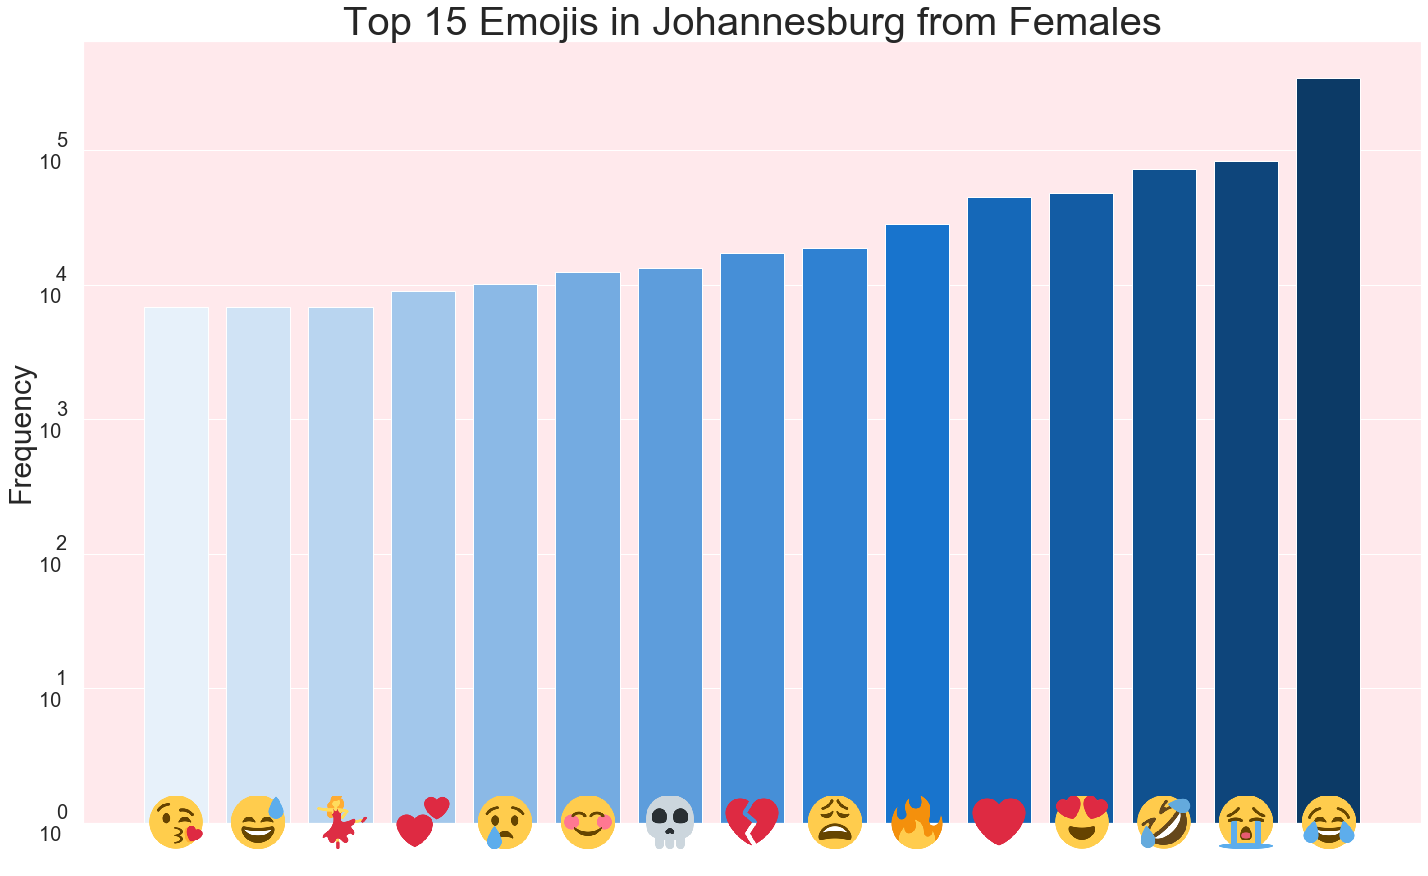

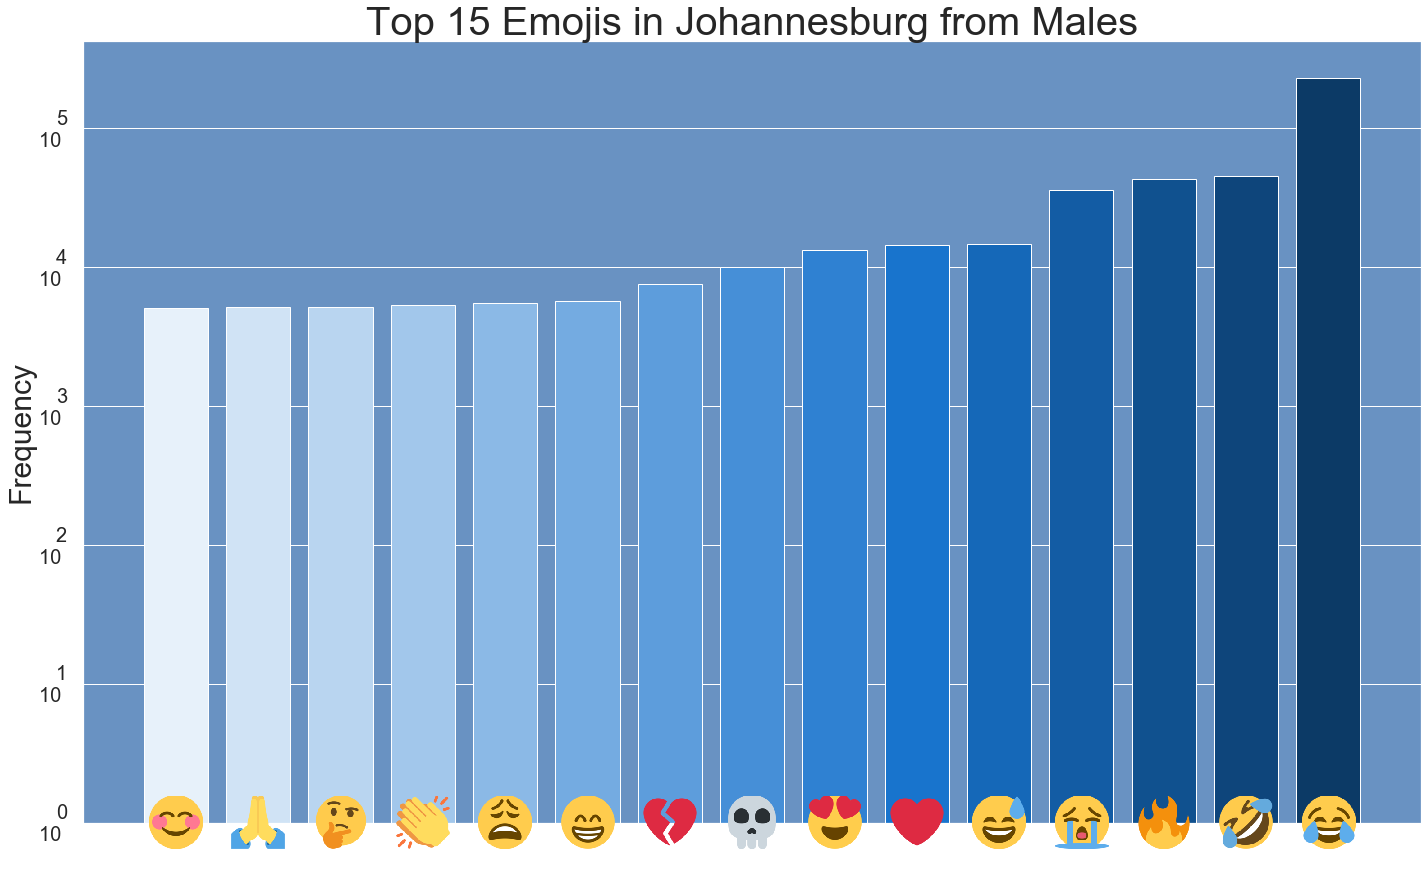

In [48]:
gender_list = ['Females','Males']
gender_values =[emojis_count_females_df,emojis_count_males_df]
gender_graph_colours=['ffe9ec','6992C2']

for ind,gen in enumerate(gender_list):
    
    # Top 15 Values
    x = gender_values[ind]['Emoji'].tail(15).values
    y = gender_values[ind]['Count'].tail(15).values
    y_log = np.log10(y.astype(int))

    # Set linespacing
    x_linespace = linspace(0, 4*pi, num=15)

    # Plot Bar Chart
    fig, ax = plt.subplots(figsize=(20,12))
    ax.yaxis.set_major_formatter(formatter_pow10)
    ax.tick_params(axis='both', which='major', pad=10)
    ax.set_facecolor('#{}'.format(gender_graph_colours[ind]))
    plt.grid(linestyle='-', linewidth=1,axis='y')
    plt.bar(x_linespace, y_log, width=0.7, bottom=None, align='center',color =colors_dodgeblue_fade)
    ax.get_xaxis().set_visible(False)
    #plt.xticks(x, fontproperties=emojis_font)  Old method
    plt.yticks(fontsize =20)
    plt.ylabel('Frequency', fontsize =30)
    plt.title('Top 15 Emojis in Johannesburg from {}'.format(gender_list[ind]), fontsize =40)
    plt.tight_layout()

    # Plot emojis on x-axis
    bar_chart_plot_emojis(ax,fig,x)
    plt.show()

## Top 15 Dinstinct Emojis by Gender

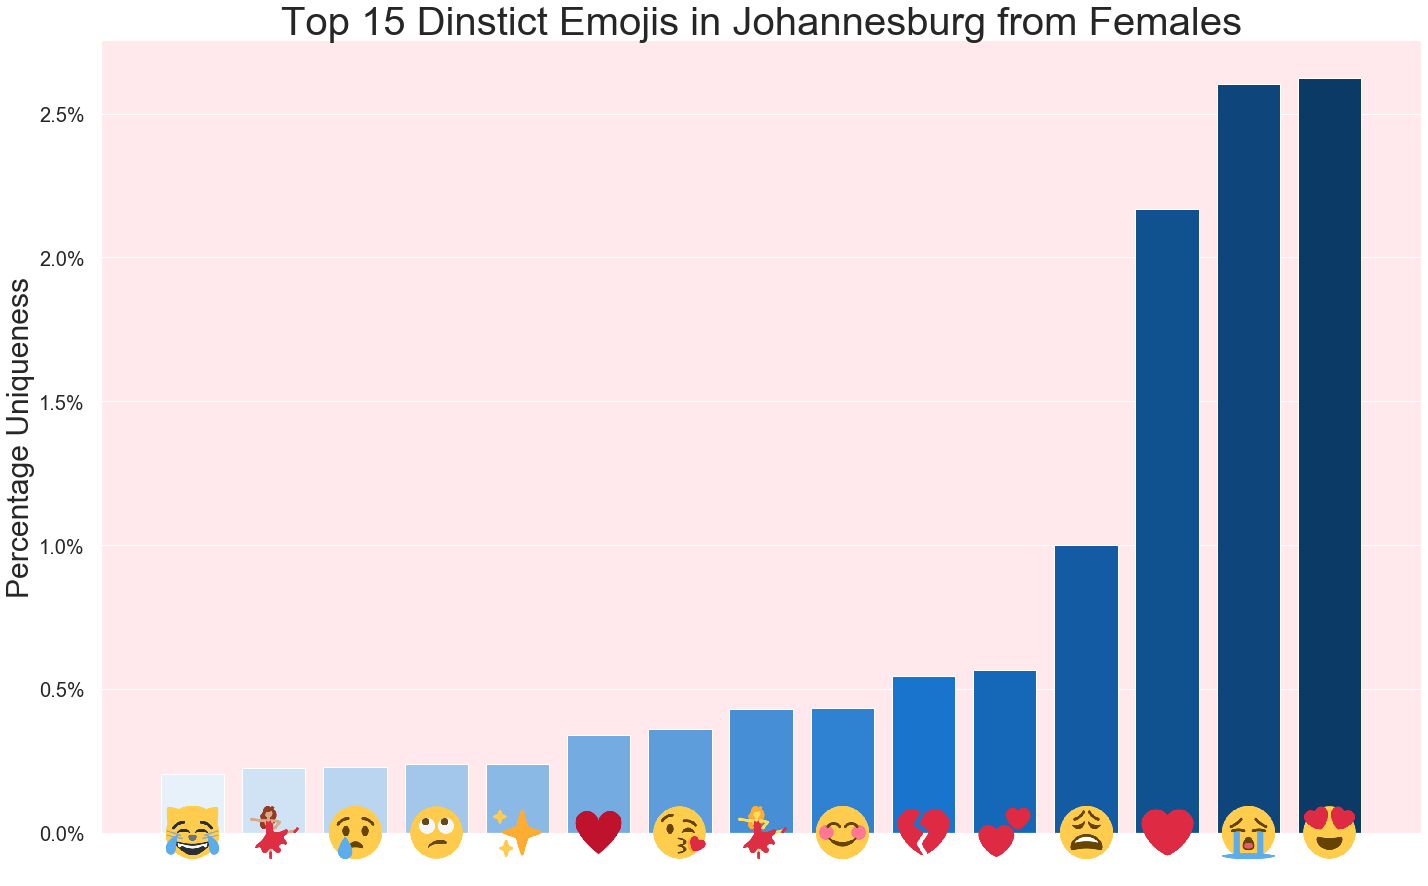

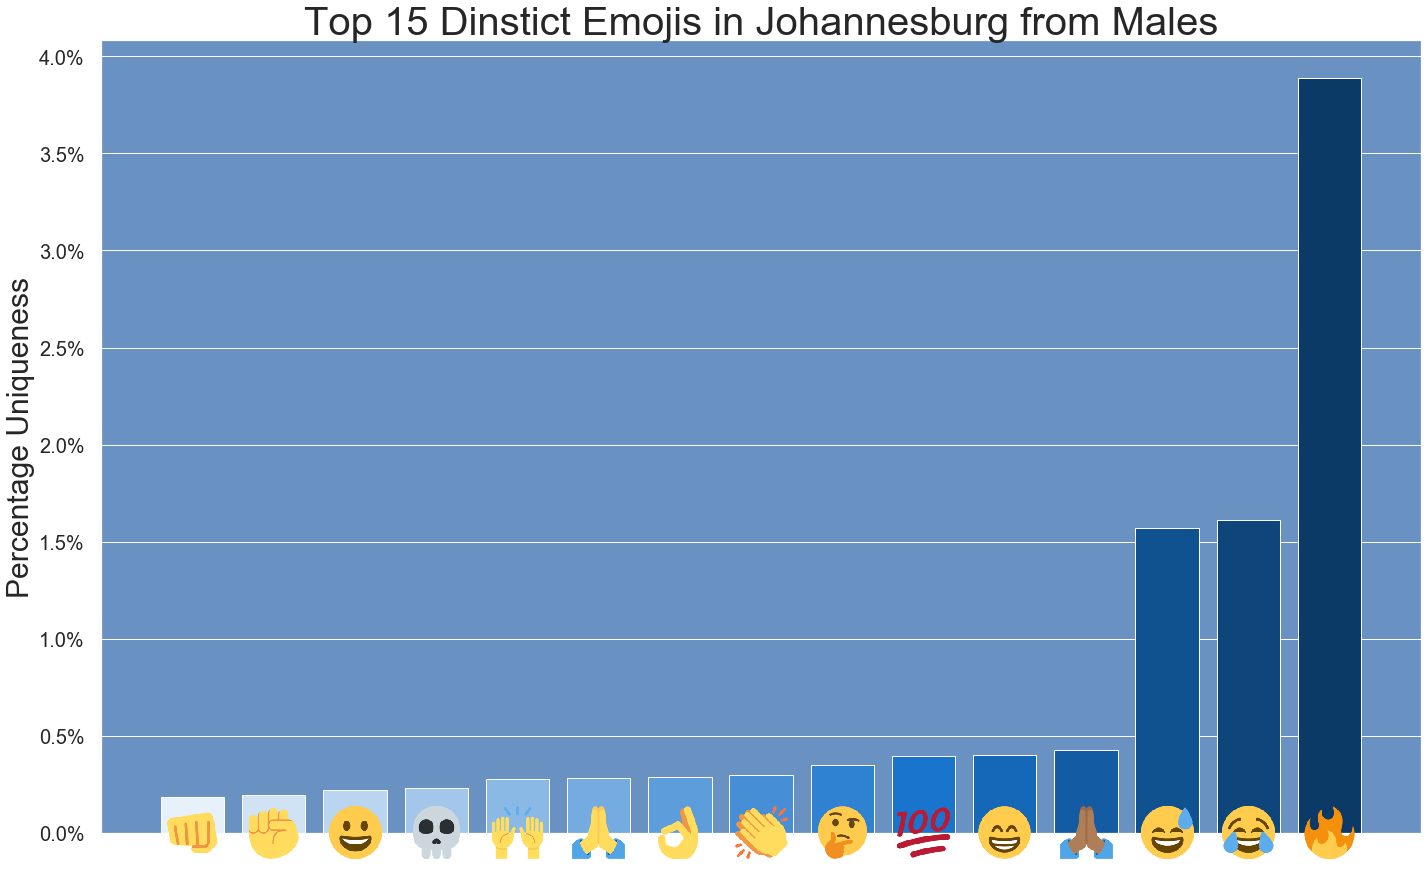

In [49]:
gender_list = ['Females','Males']
gender_values =[gender_stats_df.fillna(0).sort_values(by=['Females_Perc_Dif']),gender_stats_df.fillna(0).sort_values(by=['Males_Perc_Dif'])]
gender_graph_colours=['ffe9ec','6992C2']

for ind,gen in enumerate(gender_list):
    
    # Top 15 Values
    x = gender_values[ind]['Emoji'].tail(15).values
    y = gender_values[ind]['{}_Perc_Dif'.format(gender_list[ind])].tail(15).values
    
    # Set linespacing
    x_linespace = linspace(0, 4*pi, num=15)

    # Plot Bar Chart
    fig, ax = plt.subplots(figsize=(20,12))
    ax.yaxis.set_major_formatter(formatter_percentage)
    ax.tick_params(axis='both', which='major', pad=10)
    ax.set_facecolor('#{}'.format(gender_graph_colours[ind]))
    plt.grid(linestyle='-', linewidth=1,axis='y')
    plt.bar(x_linespace, y, width=0.7, bottom=None, align='center',color =colors_dodgeblue_fade)
    ax.get_xaxis().set_visible(False)
    #plt.xticks(x, fontproperties=emojis_font)  Old method
    plt.yticks(fontsize =20)
    plt.ylabel('Percentage Uniqueness', fontsize =30)
    plt.title('Top 15 Dinstict Emojis in Johannesburg from {}'.format(gender_list[ind]), fontsize =40)
    plt.tight_layout()

    # Plot emojis on x-axis
    bar_chart_plot_emojis(ax,fig,x)

    plt.show()

## Extract, Count & Sort Emojis for White Ethnicity

In [39]:
# Count emojis (Ethnicity Confidence: 0.75)
count_white = extract.count_all_emoji(joh_join_df.loc[(joh_join_df['ethnicity'] == 'white')& (joh_join_df['ethnicity:confidence'].astype(float)>0.75)]['text'])
count_not_white =extract.count_all_emoji(joh_join_df.loc[(joh_join_df['ethnicity'] != 'white')& (joh_join_df['ethnicity:confidence'].astype(float)>0.75)]['text'])

# Create panda dataframe to store emojis with counts

# Whites
emojis_count_white_df = pd.DataFrame(columns = ['Emoji','Whites_Count'])
for emoji in count_white:
    emojis_count_white_df = emojis_count_white_df.append({'Emoji' : emoji , 'Whites_Count' : count_white[emoji]} , ignore_index=True)

# Not Whites
emojis_count_not_white_df = pd.DataFrame(columns = ['Emoji','Not_Whites_Count'])
for emoji in count_not_white:
    emojis_count_not_white_df = emojis_count_not_white_df.append({'Emoji' : emoji , 'Not_Whites_Count' : count_not_white[emoji]} , ignore_index=True)    

# White Stats
white_stats_df = emojis_count_white_df.join(emojis_count_not_white_df.set_index('Emoji'), on='Emoji')

# Calculate percentage usage for each emoji per ethnicity
white_count_perc = white_stats_df['Whites_Count'] /white_stats_df['Whites_Count'].sum()
white_stats_df['Whites_Count_Perc']=white_count_perc
not_white_count_perc = white_stats_df['Not_Whites_Count'] /white_stats_df['Not_Whites_Count'].sum()
white_stats_df['Not_Whites_Count_Perc']=not_white_count_perc
white_perc_dif = white_stats_df['Whites_Count_Perc'] - white_stats_df['Not_Whites_Count_Perc']
white_stats_df['Whites_Perc_Dif']=white_perc_dif
not_white_perc_dif = white_stats_df['Not_Whites_Count_Perc'] - white_stats_df['Whites_Count_Perc']
white_stats_df['Not_Whites_Perc_Dif']=not_white_perc_dif

white_stats_df = white_stats_df.fillna(0).sort_values(by=['Whites_Perc_Dif'])
white_stats_df.tail(20)

,Emoji,Whites_Count,Not_Whites_Count,Whites_Count_Perc,Not_Whites_Count_Perc,Whites_Perc_Dif,Not_Whites_Perc_Dif
198,👏🏼,200,397,0.003209,0.000229,0.002980,-0.002980
32,🙄,544,9279,0.008728,0.005351,0.003377,-0.003377
34,💪,268,1595,0.004300,0.000920,0.003380,-0.003380
748,📢,232,520,0.003722,0.000300,0.003422,-0.003422
15,😀,391,4926,0.006273,0.002841,0.003433,-0.003433
101,⭐,222,210,0.003562,0.000121,0.003441,-0.003441
210,🤡,227,81,0.003642,0.000047,0.003595,-0.003595
507,👅,280,850,0.004493,0.000490,0.004002,-0.004002
43,😎,381,3270,0.006113,0.001886,0.004227,-0.004227
33,🙏,662,9887,0.010622,0.005702,0.004920,-0.004920


## Extract, Count & Sort Emojis for Black Ethnicity

In [40]:
# Count emojis (Ethnicity Confidence: 0.75)
count_black = extract.count_all_emoji(joh_join_df.loc[(joh_join_df['ethnicity'] == 'black')& (joh_join_df['ethnicity:confidence'].astype(float)>0.75)]['text'])
count_not_black  =extract.count_all_emoji(joh_join_df.loc[(joh_join_df['ethnicity'] != 'black')& (joh_join_df['ethnicity:confidence'].astype(float)>0.75)]['text'])

# Create panda dataframe to store emojis with counts

# Blacks 
emojis_count_black_df = pd.DataFrame(columns = ['Emoji','Blacks_Count'])
for emoji in count_black:
    emojis_count_black_df = emojis_count_black_df.append({'Emoji' : emoji , 'Blacks_Count' : count_black[emoji]} , ignore_index=True)

# Not Blacks
emojis_count_not_black_df = pd.DataFrame(columns = ['Emoji','Not_Blacks_Count'])
for emoji in count_not_black:
    emojis_count_not_black_df = emojis_count_not_black_df.append({'Emoji' : emoji , 'Not_Blacks_Count' : count_not_black[emoji]} , ignore_index=True)    

# Black Stats
black_stats_df = emojis_count_black_df.join(emojis_count_not_black_df.set_index('Emoji'), on='Emoji')

# Calculate percentage usage for each emoji per ethnicity
black_count_perc = black_stats_df['Blacks_Count'] /black_stats_df['Blacks_Count'].sum()
black_stats_df['Blacks_Count_Perc']=black_count_perc
not_black_count_perc = black_stats_df['Not_Blacks_Count'] /black_stats_df['Not_Blacks_Count'].sum()
black_stats_df['Not_Blacks_Count_Perc']=not_black_count_perc
black_perc_dif = black_stats_df['Blacks_Count_Perc'] - black_stats_df['Not_Blacks_Count_Perc']
black_stats_df['Blacks_Perc_Dif']=black_perc_dif
not_black_perc_dif = black_stats_df['Not_Blacks_Count_Perc'] - black_stats_df['Blacks_Count_Perc']
black_stats_df['Not_Blacks_Perc_Dif']=not_black_perc_dif

black_stats_df = black_stats_df.fillna(0).sort_values(by=['Blacks_Perc_Dif'])
black_stats_df.tail(20)

,Emoji,Blacks_Count,Not_Blacks_Count,Blacks_Count_Perc,Not_Blacks_Count_Perc,Blacks_Perc_Dif,Not_Blacks_Perc_Dif
105,🌚,3182,33,0.001816,0.000501,0.001315,-0.001315
101,💃🏾,2369,1,0.001352,0.000015,0.001336,-0.001336
64,🙆,3100,20,0.001769,0.000304,0.001465,-0.001465
191,💃🏽,3087,19,0.001761,0.000288,0.001473,-0.001473
100,👌🏾,2658,1,0.001517,0.000015,0.001501,-0.001501
81,💯,6088,89,0.003474,0.001351,0.002123,-0.002123
178,👏🏾,4268,12,0.002435,0.000182,0.002253,-0.002253
35,😍,63460,2228,0.036208,0.033816,0.002392,-0.002392
86,💃,9078,147,0.005180,0.002231,0.002948,-0.002948
32,🙌🏾,5912,16,0.003373,0.000243,0.003130,-0.003130


## Extract, Count & Sort Emojis for Other and Hispanic Ethnicity

In [41]:
# Count emojis (Ethnicity Confidence: 0.75)
count_other = extract.count_all_emoji(joh_join_df.loc[((joh_join_df['ethnicity'] == 'hispanic')|(joh_join_df['ethnicity'] == 'other'))& (joh_join_df['ethnicity:confidence'].astype(float)>0.75)]['text'])
count_not_other  =extract.count_all_emoji(joh_join_df.loc[(joh_join_df['ethnicity'] != 'hispanic')&(joh_join_df['ethnicity'] != 'other')& (joh_join_df['ethnicity:confidence'].astype(float)>0.75)]['text'])

# Create panda dataframe to store emojis with counts

# Others 
emojis_count_other_df = pd.DataFrame(columns = ['Emoji','Others_Count'])
for emoji in count_other:
    emojis_count_other_df = emojis_count_other_df.append({'Emoji' : emoji , 'Others_Count' : count_other[emoji]} , ignore_index=True)

# Not Others
emojis_count_not_other_df = pd.DataFrame(columns = ['Emoji','Not_Others_Count'])
for emoji in count_not_other:
    emojis_count_not_other_df = emojis_count_not_other_df.append({'Emoji' : emoji , 'Not_Others_Count' : count_not_other[emoji]} , ignore_index=True)    

# Others Stats
other_stats_df = emojis_count_other_df.join(emojis_count_not_other_df.set_index('Emoji'), on='Emoji')

# Calculate percentage usage for each emoji per ethnicity
other_count_perc = other_stats_df['Others_Count'] /other_stats_df['Others_Count'].sum()
other_stats_df['Others_Count_Perc']=other_count_perc
not_other_count_perc = other_stats_df['Not_Others_Count'] /other_stats_df['Not_Others_Count'].sum()
other_stats_df['Not_Others_Count_Perc']=not_other_count_perc
other_perc_dif = other_stats_df['Others_Count_Perc'] - other_stats_df['Not_Others_Count_Perc']
other_stats_df['Others_Perc_Dif']=other_perc_dif
not_other_perc_dif = other_stats_df['Not_Others_Count_Perc'] - other_stats_df['Others_Count_Perc']
other_stats_df['Not_Others_Perc_Dif']=not_black_perc_dif

other_stats_df = other_stats_df.fillna(0).sort_values(by=['Others_Perc_Dif'])
other_stats_df.tail(20)

,Emoji,Others_Count,Not_Others_Count,Others_Count_Perc,Not_Others_Count_Perc,Others_Perc_Dif,Not_Others_Perc_Dif
50,🤷‍♂️,13,256,0.006182,0.000169,0.006013,-0.000084
2,✌🏽,15,290,0.007133,0.000192,0.006941,-0.000350
131,😓,18,2038,0.008559,0.001347,0.007213,-0.000012
121,🤷🏽‍♀️,18,1668,0.008559,0.001102,0.007457,-0.000697
76,😎,21,3630,0.009986,0.002398,0.007587,0.000138
49,🙈,27,7502,0.012839,0.004957,0.007882,-0.000323
74,👍,20,1290,0.009510,0.000852,0.008658,-0.000212
122,☹,23,3059,0.010937,0.002021,0.008916,-0.000422
120,🌺,20,536,0.009510,0.000354,0.009156,0.000436
139,😣,33,4015,0.015692,0.002653,0.013039,-0.001283


## Extract, Count & Sort Emojis for Asian Ethnicity

In [42]:
# Count emojis (Ethnicity Confidence: 0.75)
count_asian = extract.count_all_emoji(joh_join_df.loc[(joh_join_df['ethnicity'] == 'asian')& (joh_join_df['ethnicity:confidence'].astype(float)>0.75)]['text'])
count_not_asian  =extract.count_all_emoji(joh_join_df.loc[(joh_join_df['ethnicity'] != 'asian')&(joh_join_df['ethnicity:confidence'].astype(float)>0.75)]['text'])

# Create panda dataframe to store emojis with counts

# Asians 
emojis_count_asian_df = pd.DataFrame(columns = ['Emoji','Asians_Count'])
for emoji in count_asian:
    emojis_count_asian_df = emojis_count_asian_df.append({'Emoji' : emoji , 'Asians_Count' : count_asian[emoji]} , ignore_index=True)

# Not Asians
emojis_count_not_asian_df = pd.DataFrame(columns = ['Emoji','Not_Asians_Count'])
for emoji in count_not_asian:
    emojis_count_not_asian_df = emojis_count_not_asian_df.append({'Emoji' : emoji , 'Not_Asians_Count' : count_not_asian[emoji]} , ignore_index=True)    

# Asians Stats
asian_stats_df = emojis_count_asian_df.join(emojis_count_not_asian_df.set_index('Emoji'), on='Emoji')

# Calculate percentage usage for each emoji per gender
asian_count_perc = asian_stats_df['Asians_Count'] /asian_stats_df['Asians_Count'].sum()
asian_stats_df['Asians_Count_Perc']=asian_count_perc
not_asian_count_perc = asian_stats_df['Not_Asians_Count'] /asian_stats_df['Not_Asians_Count'].sum()
asian_stats_df['Not_Asians_Count_Perc']=not_asian_count_perc
asian_perc_dif = asian_stats_df['Asians_Count_Perc'] - asian_stats_df['Not_Asians_Count_Perc']
asian_stats_df['Asians_Perc_Dif']=asian_perc_dif
not_asian_perc_dif = asian_stats_df['Not_Asians_Count_Perc'] - asian_stats_df['Asians_Count_Perc']
asian_stats_df['Not_Asians_Perc_Dif']=not_black_perc_dif

asian_stats_df = asian_stats_df.fillna(0).sort_values(by=['Asians_Perc_Dif'])
asian_stats_df.tail(20)

,Emoji,Asians_Count,Not_Asians_Count,Asians_Count_Perc,Not_Asians_Count_Perc,Asians_Perc_Dif,Not_Asians_Perc_Dif
27,💛,6,3755,0.003766,0.002655,0.001111,0.000316
57,💓,3,1054,0.001883,0.000745,0.001138,-0.000576
43,🙇‍♀️,2,24,0.001255,0.000017,0.001239,-0.000268
20,🐰,2,23,0.001255,0.000016,0.001239,0.003671
55,🐳,2,15,0.001255,0.000011,0.001245,0.000205
62,🚷,2,3,0.001255,0.000002,0.001253,0.001231
53,🌞,3,618,0.001883,0.000437,0.001446,0.000211
50,🤦‍♀️,3,427,0.001883,0.000302,0.001581,-0.000084
39,👀,14,9594,0.008788,0.006784,0.002004,0.001165
24,🤷‍♀️,5,675,0.003139,0.000477,0.002661,0.001032


## Top 15 Emojis Graph by Ethnicity

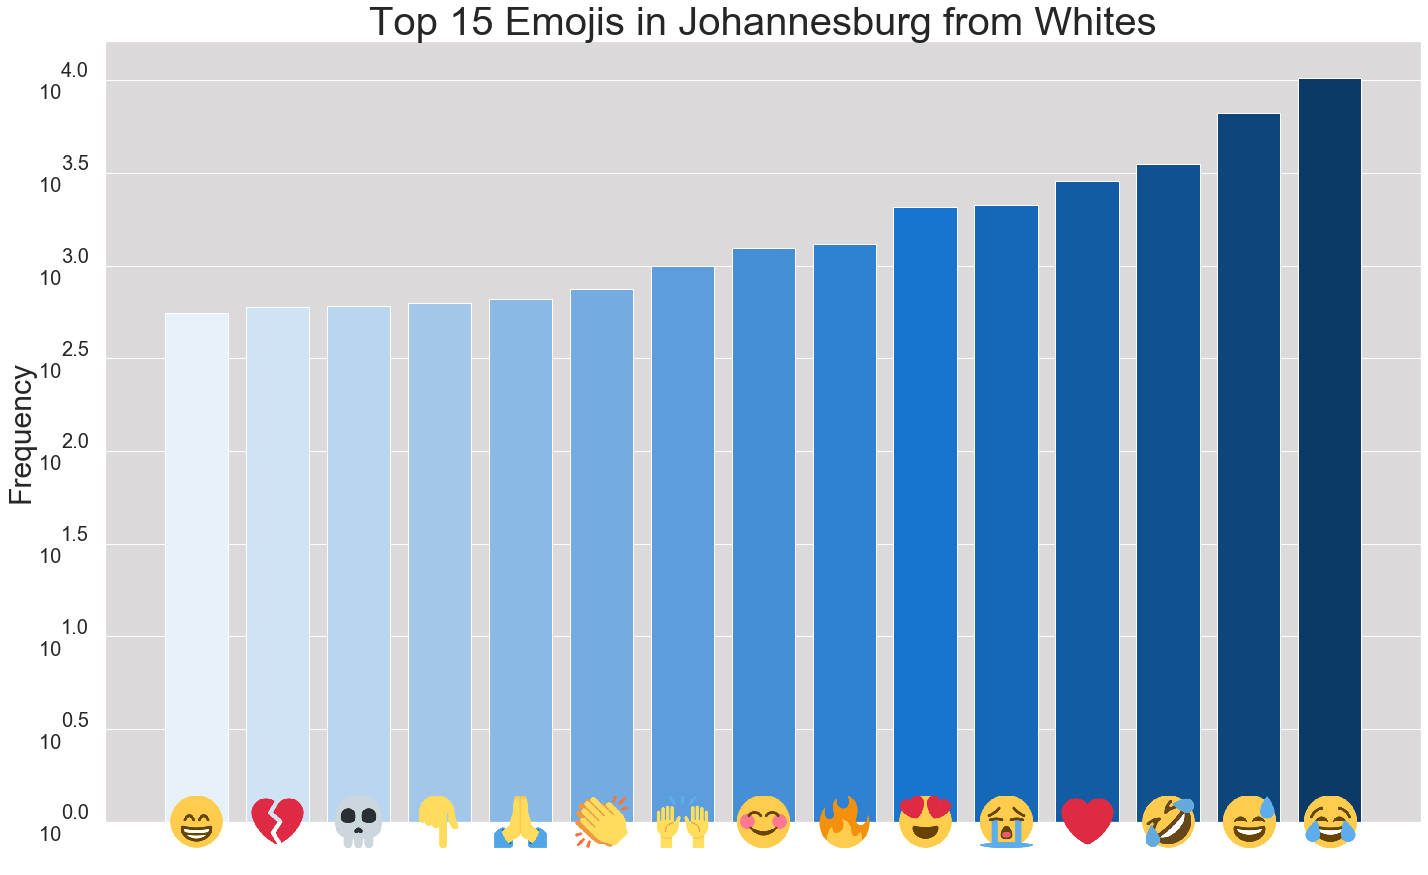

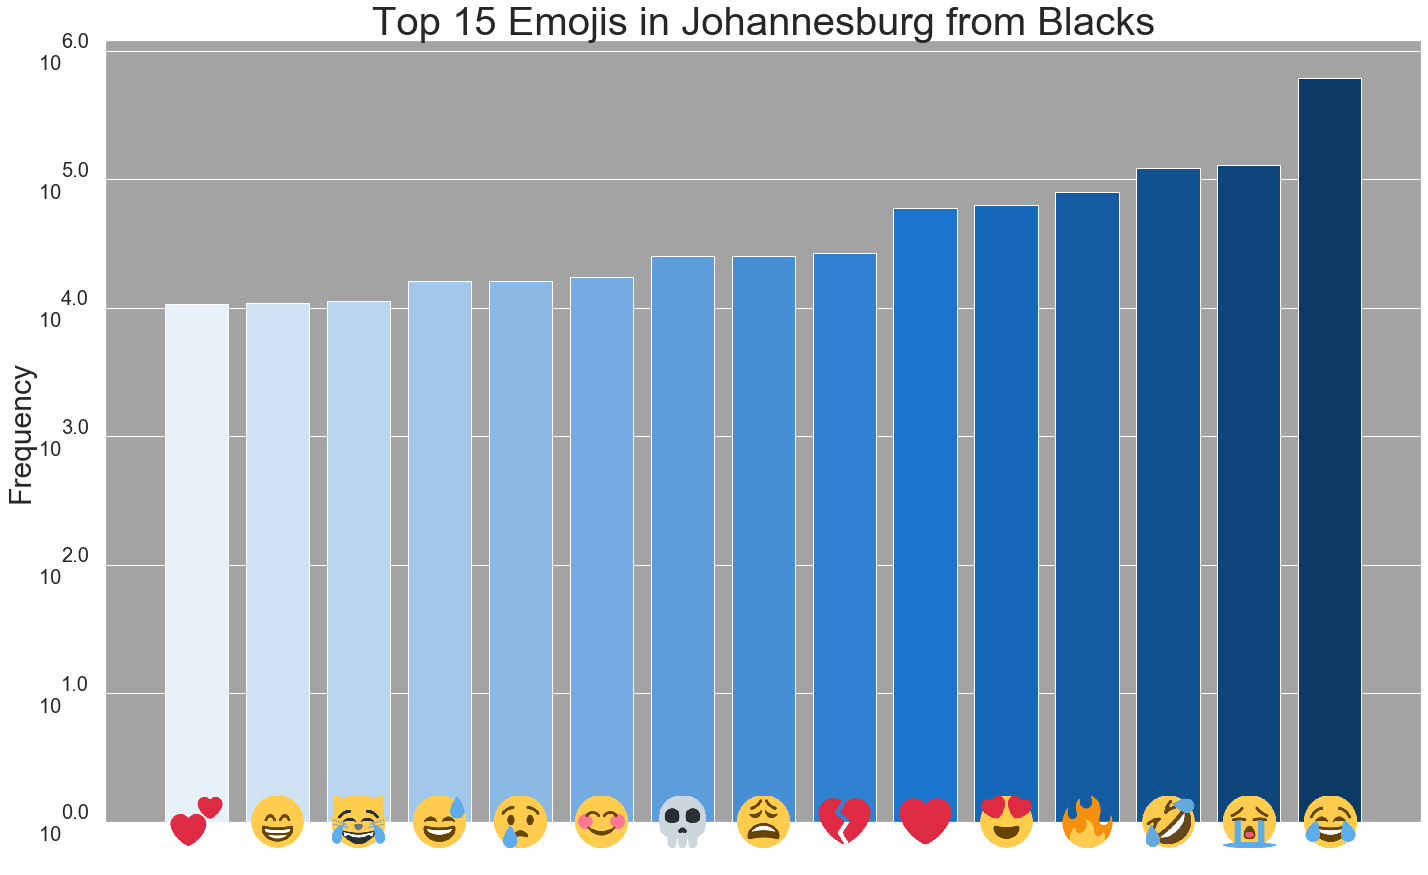

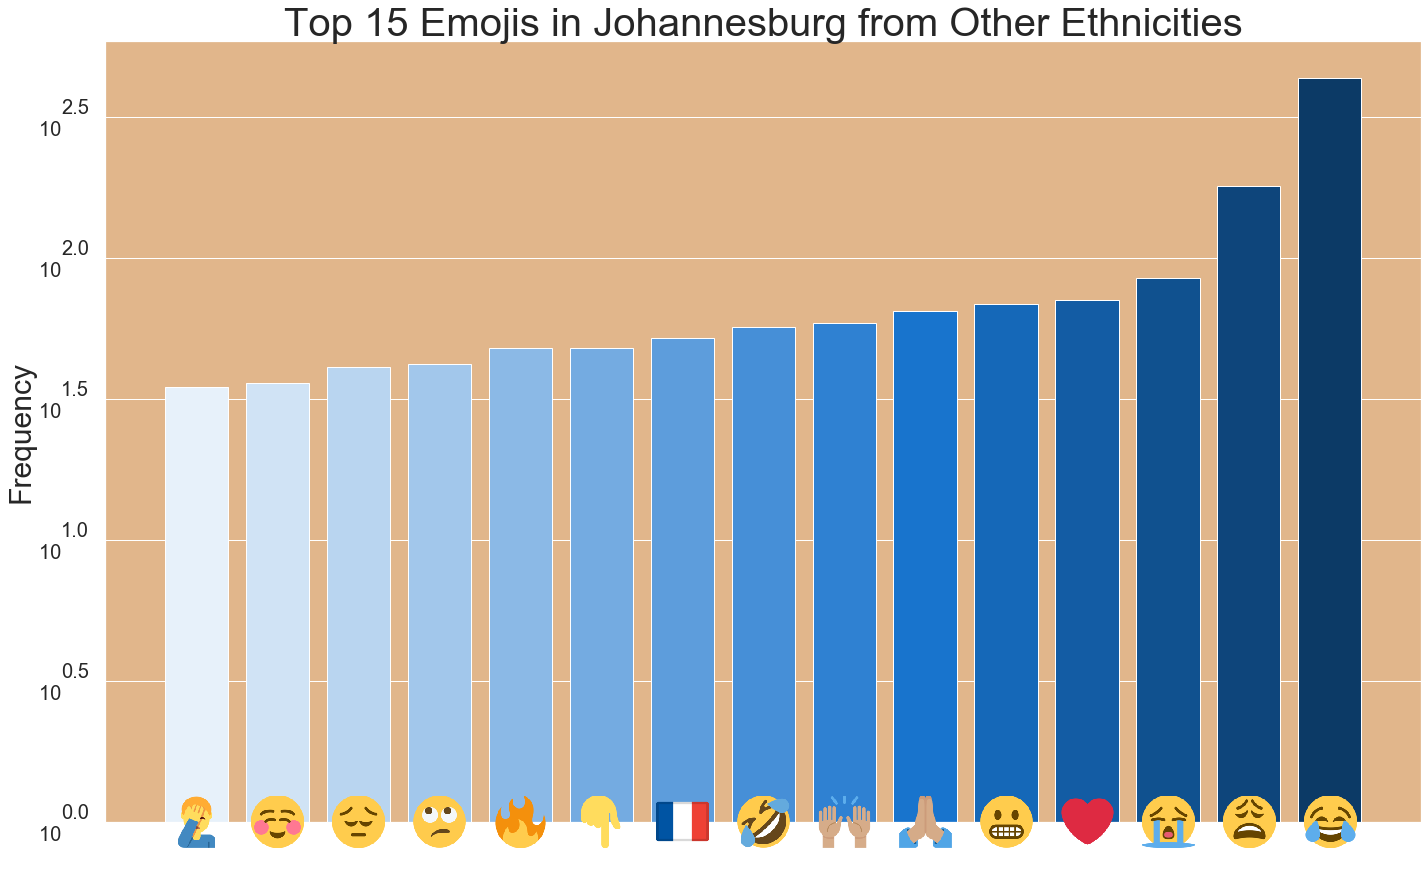

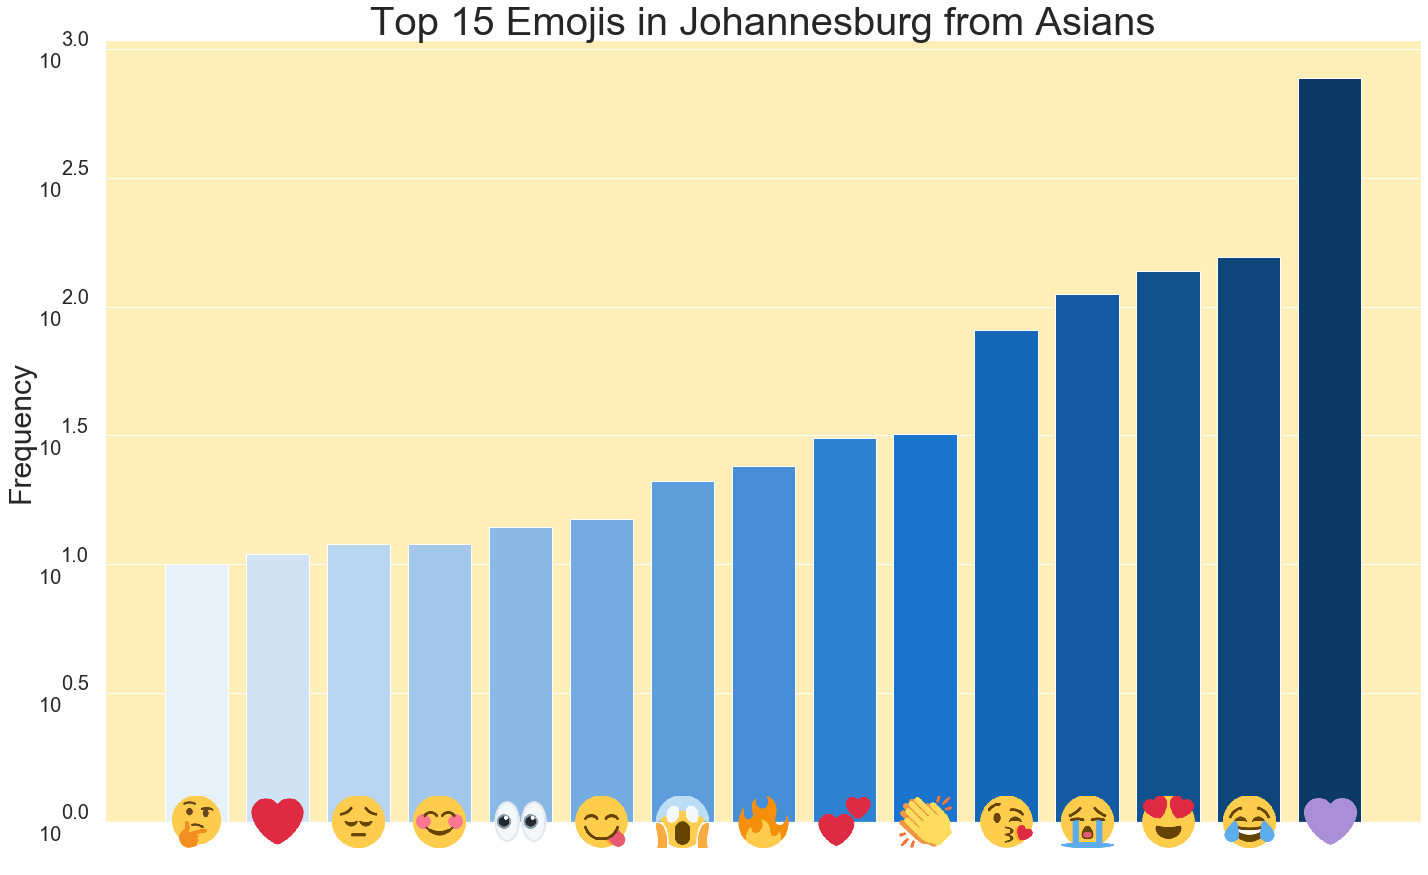

In [52]:
ethnicities_list = ['Whites','Blacks','Others','Asians']
ethnicities_values =[white_stats_df.sort_values(by=['Whites_Count']),black_stats_df.sort_values(by=['Blacks_Count']),other_stats_df.sort_values(by=['Others_Count']),asian_stats_df.sort_values(by=['Asians_Count'])]
ethnicities_graph_colours=['dbd9d9','a3a3a3','e1b68b','ffeeb7']

for ind,ethn in enumerate(ethnicities_list):

     # Top 15 Values
    x = ethnicities_values[ind]['Emoji'].tail(15).values
    y = ethnicities_values[ind]['{}_Count'.format(ethnicities_list[ind])].tail(15).values
    y_log = np.log10(y.astype(int))

    # Set linespacing
    x_linespace = linspace(0, 4*pi, num=15)

    # Plot Bar Chart
    fig, ax = plt.subplots(figsize=(20,12))
    ax.yaxis.set_major_formatter(formatter_pow10_1dp)
    ax.tick_params(axis='both', which='major', pad=10)
    ax.set_facecolor('#{}'.format(ethnicities_graph_colours[ind]))
    plt.grid(linestyle='-', linewidth=1,axis='y')
    plt.bar(x_linespace, y_log, width=0.7, bottom=None, align='center',color =colors_dodgeblue_fade)
    ax.get_xaxis().set_visible(False)
    plt.yticks(fontsize =20)
    plt.ylabel('Frequency', fontsize =30)
    plt.title('Top 15 Emojis in Johannesburg from {}'.format(ethnicities_list[ind]), fontsize =40)
    if(ethnicities_list[ind] == 'Others'):
        plt.title('Top 15 Emojis in Johannesburg from Other Ethnicities', fontsize =40)
    plt.tight_layout()

    # Plot emojis on x-axis
    bar_chart_plot_emojis(ax,fig,x)
    plt.show()

## Top 15 Dinstict Emojis Graph by Ethnicity

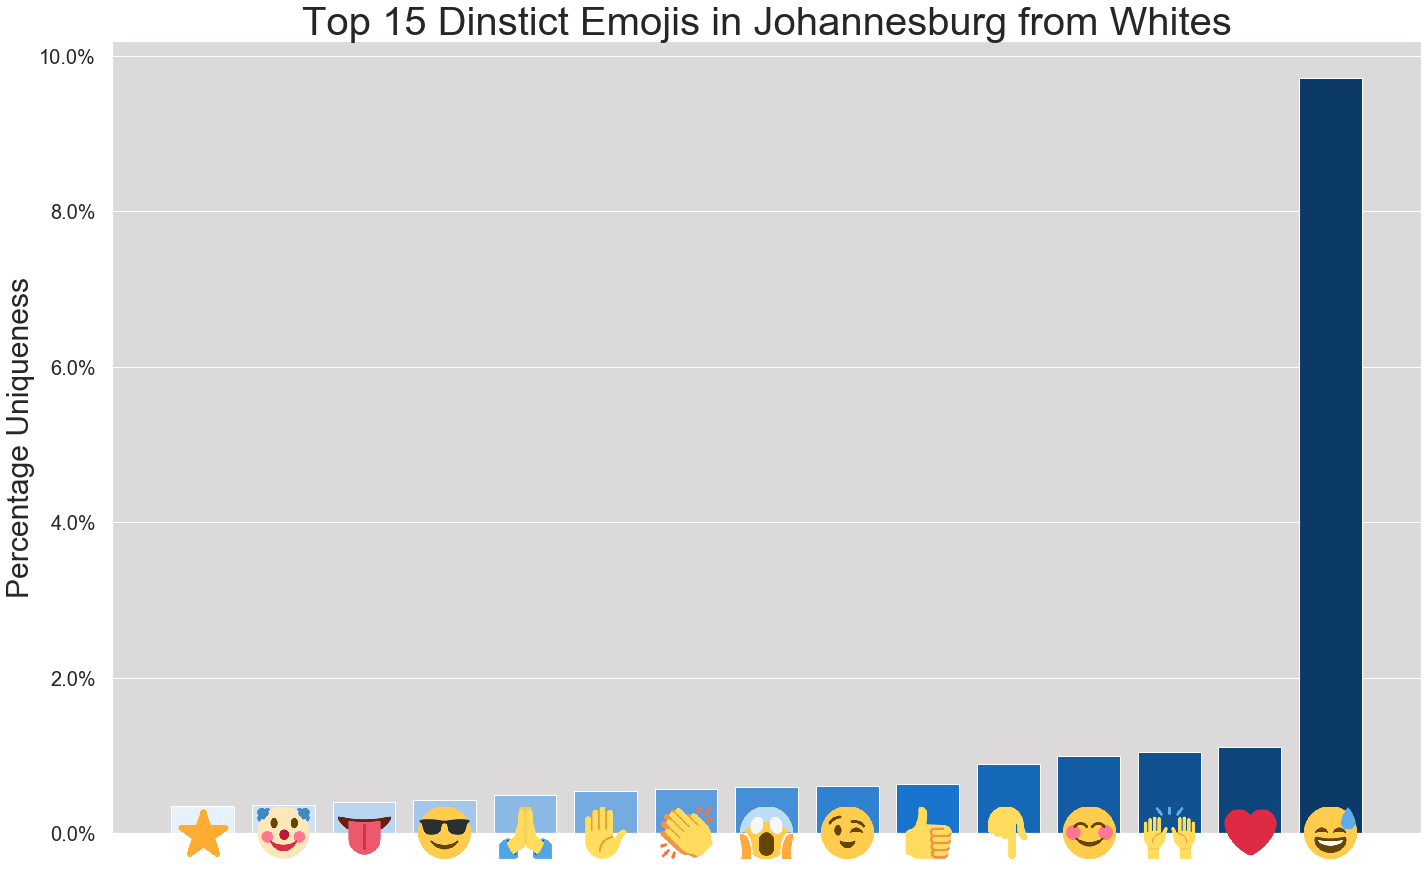

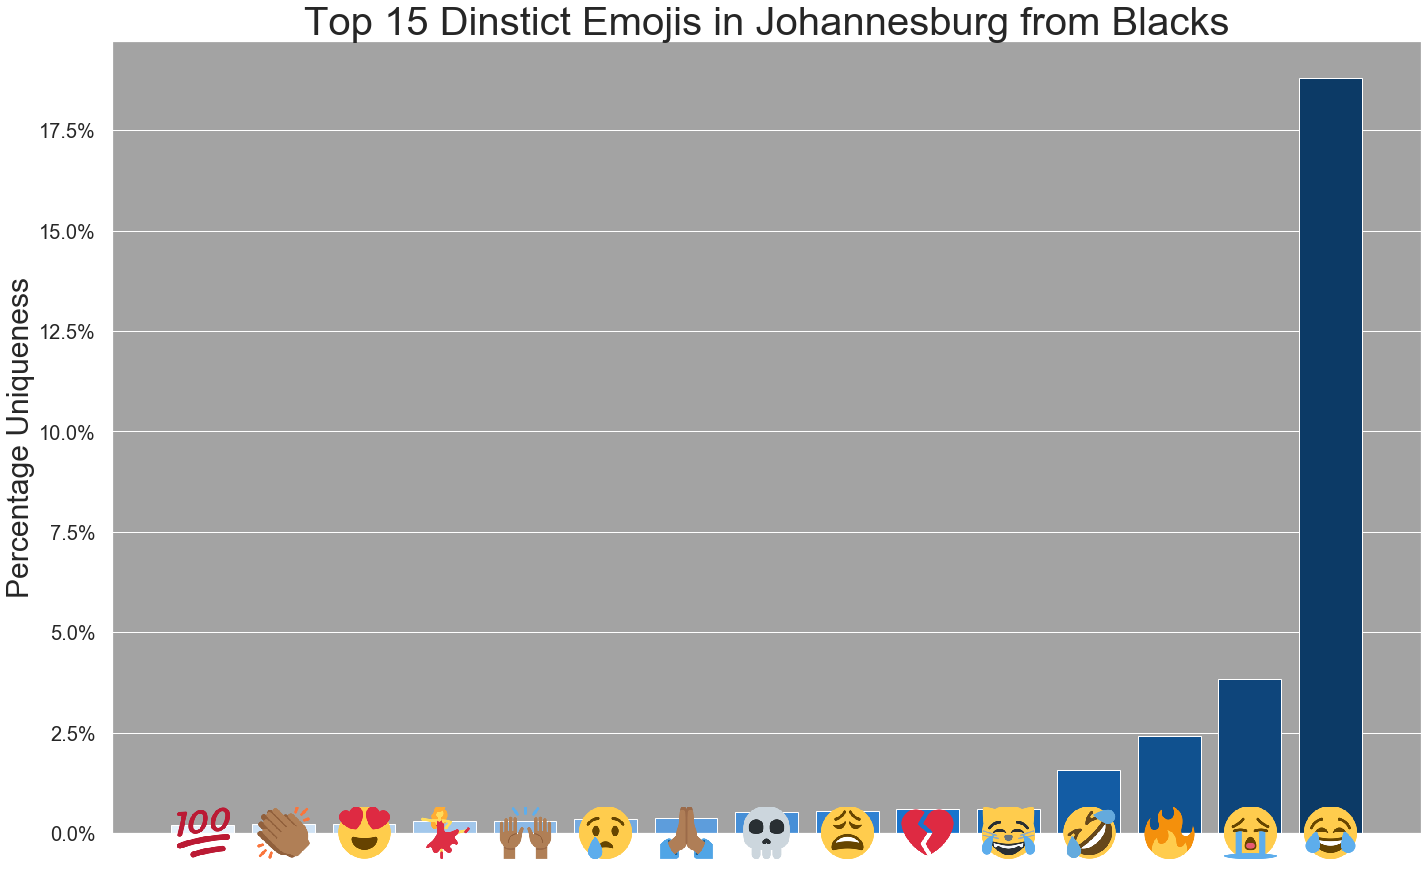

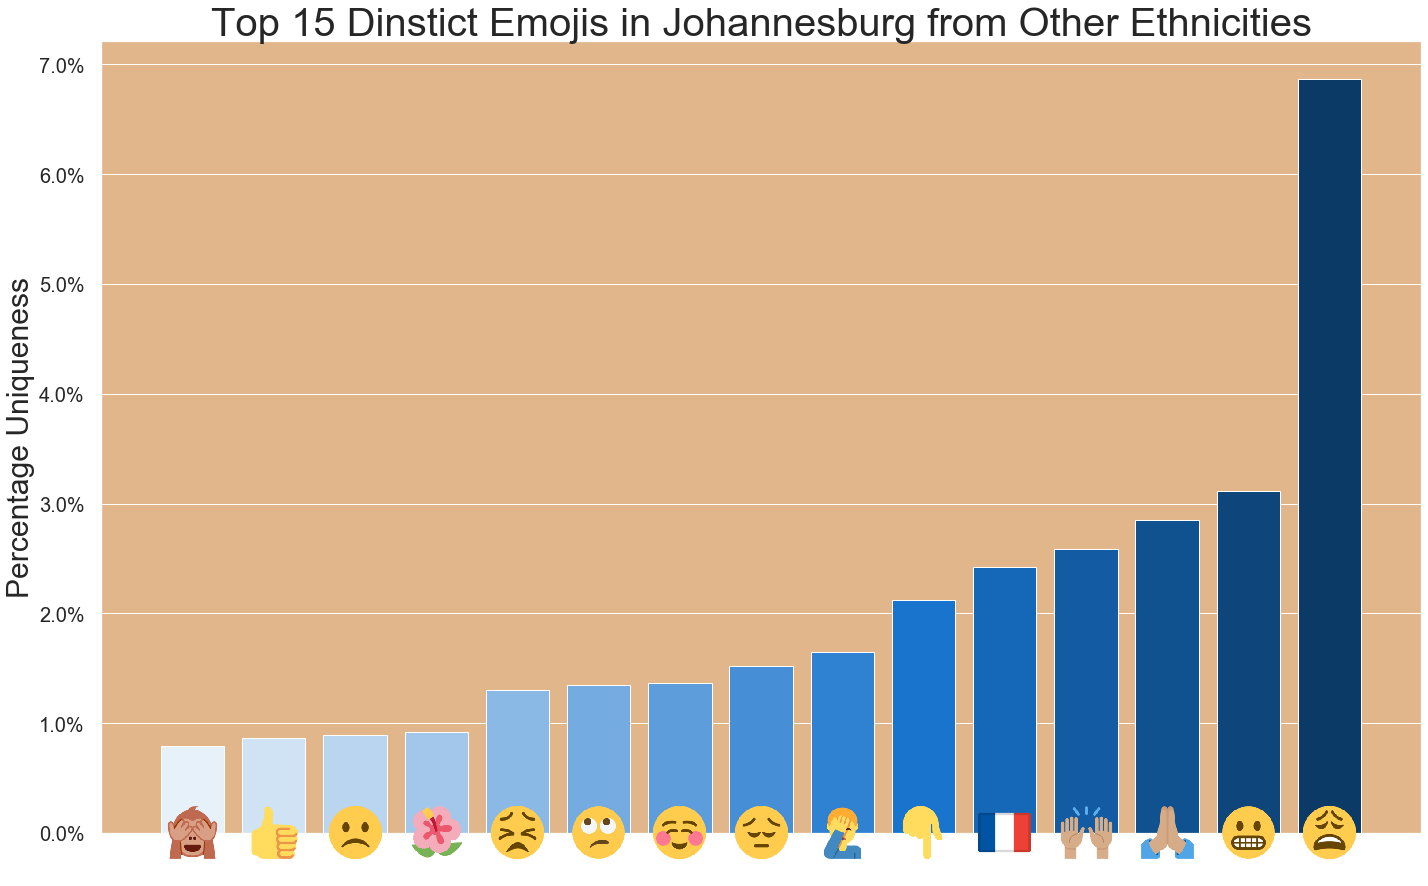

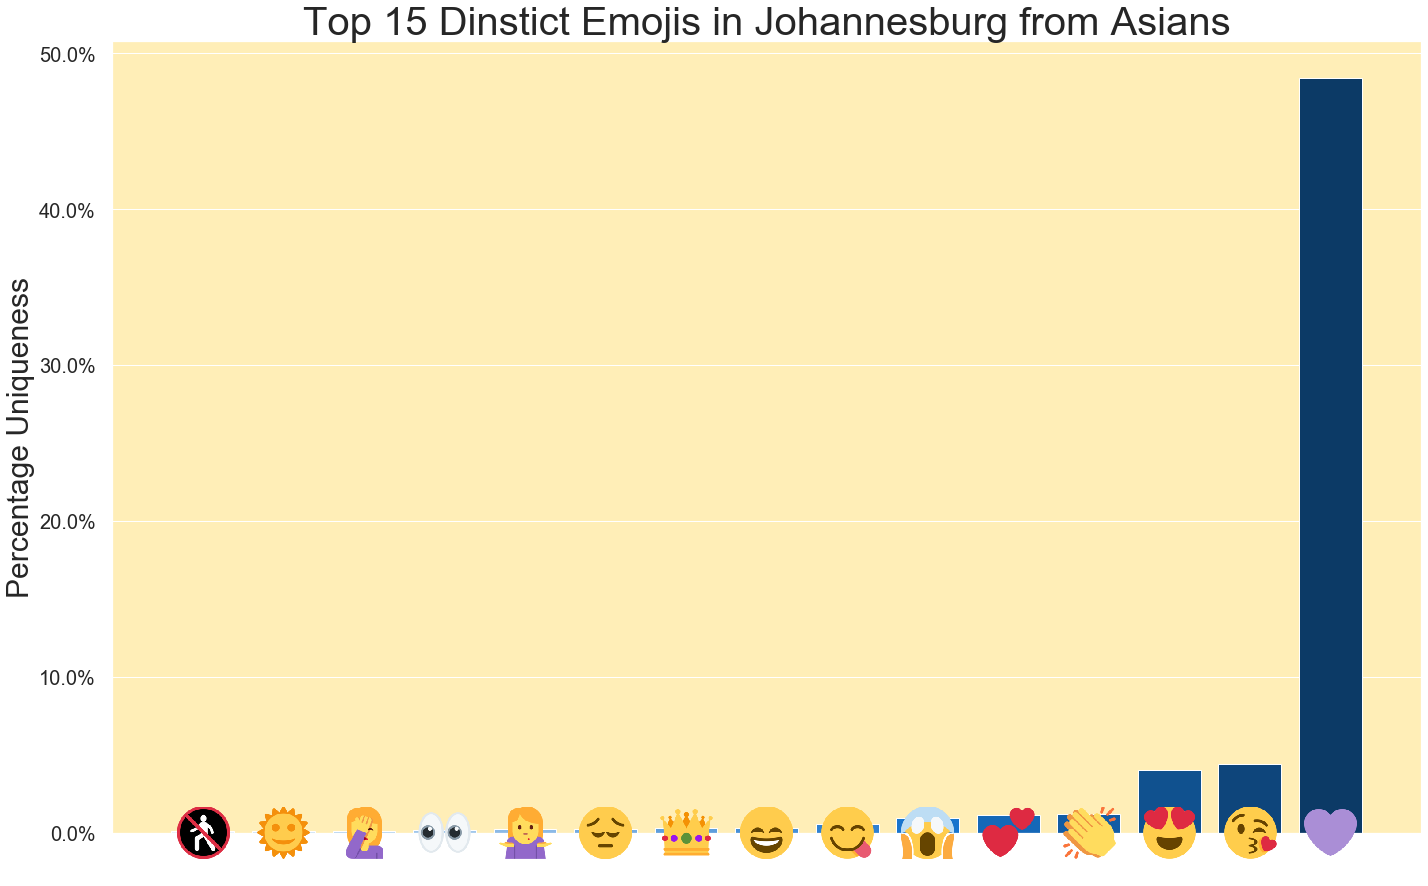

In [53]:
ethnicities_list = ['Whites','Blacks','Others','Asians']
ethnicities_values =[white_stats_df.sort_values(by=['Whites_Perc_Dif']),black_stats_df.sort_values(by=['Blacks_Perc_Dif']),other_stats_df.sort_values(by=['Others_Perc_Dif']),asian_stats_df.sort_values(by=['Asians_Perc_Dif'])]
ethnicities_graph_colours=['dbd9d9','a3a3a3','e1b68b','ffeeb7']

for ind,ethn in enumerate(ethnicities_list):

     # Top 15 Values
    x = ethnicities_values[ind]['Emoji'].tail(15).values
    y = ethnicities_values[ind]['{}_Perc_Dif'.format(ethnicities_list[ind])].tail(15).values

    # Set linespacing
    x_linespace = linspace(0, 4*pi, num=15)

    # Plot Bar Chart
    fig, ax = plt.subplots(figsize=(20,12))
    ax.yaxis.set_major_formatter(formatter_percentage)
    ax.tick_params(axis='both', which='major', pad=10)
    ax.set_facecolor('#{}'.format(ethnicities_graph_colours[ind]))
    plt.grid(linestyle='-', linewidth=1,axis='y')
    plt.bar(x_linespace, y, width=0.7, bottom=None, align='center',color =colors_dodgeblue_fade)
    ax.get_xaxis().set_visible(False)
    plt.yticks(fontsize =20)
    plt.ylabel('Percentage Uniqueness', fontsize =30)
    plt.title('Top 15 Dinstict Emojis in Johannesburg from {}'.format(ethnicities_list[ind]), fontsize =40)
    if(ethnicities_list[ind] == 'Others'):
        plt.title('Top 15 Dinstict Emojis in Johannesburg from Other Ethnicities', fontsize =40)
    plt.tight_layout()

    # Plot emojis on x-axis
    bar_chart_plot_emojis(ax,fig,x)
    plt.show()

## Top 15 Emojis in Johannesburg Pie Chart

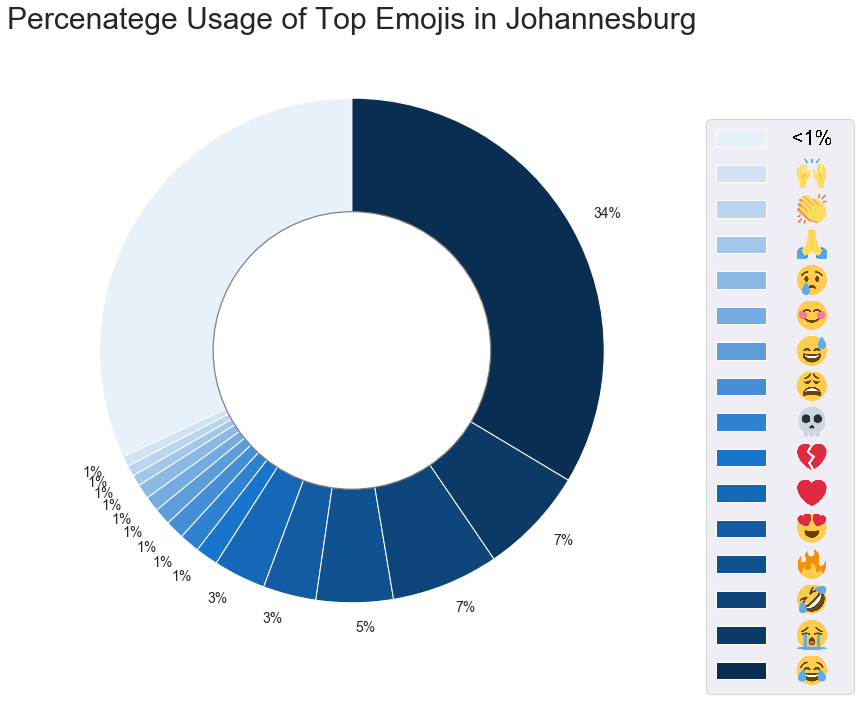

In [45]:
x = emojis_count_df['Emoji'].tail(15).values
y = (emojis_count_df['Count']/emojis_count_df['Count'].sum()).tail(15).values
fill = 1 -y.sum()
new_y = np.append([fill],y)

y_labels = []
for i,perc in enumerate (y):
    y_labels.append("{:.0f}%".format(perc*100))
# Don't show other <1%
y_labels.insert(0,"")

# Plot pie chart
fig, ax = plt.subplots(figsize=(17,12))
title = plt.title('Percenatege Usage of Top Emojis in Johannesburg', fontsize =30)
title.set_ha("center")
plt.gca().axis("equal")
pie = plt.pie(new_y,labels=y_labels,colors=colors_dodgeblue_fade, startangle=90, textprops={'fontsize': 14})
legend = plt.legend(pie[0],np.append(['other'],x), bbox_to_anchor=(0.67,0.45), loc="center right", fontsize=25, 
           bbox_transform=plt.gcf().transFigure)
plt.setp(legend.get_texts(), color='#ededf3')
plt.subplots_adjust(left=0.0, bottom=0.15, right=0.5)

# Add cicrle in the center
centre_circle = plt.Circle((0,0),0.55,color='grey', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Plot emojis on legend
pie_chart_plot_emojis(ax,fig,x)
plt.show()